In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers.pooling.max_pooling2d import MaxPool2D
from keras.utils import to_categorical
from tensorflow.python.ops.init_ops import ConvolutionOrthogonal2D as Conv2D
from keras.engine.sequential import Sequential
from tensorflow.python.ops.gen_nn_ops import LeakyRelu
from keras.backend import conv2d

from tensorflow.python.keras.engine.sequential import Sequential

from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import splitfolders
import numpy as np
import pandas as pd

In [ ]:
#first we load our chosen dataset
cifar10_data = keras.datasets.cifar10 #a 50k image dataset of a variety of vehicles and animals 32x32
(X_train_full, y_train_full), (X_test, y_test) = cifar10_data.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
#displays a brief review of the data structure
print('Training data: ', X_train_full.shape, y_train_full.shape)
print('Testing data: ', X_test.shape, y_test.shape)

Training data:  (50000, 32, 32, 3) (50000, 1)
Testing data:  (10000, 32, 32, 3) (10000, 1)


In [ ]:
#outine the training labels
data_cat = np.unique(y_train_full)
data_cat = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
                   "Dog", "frog", "Horse", "Ship", "Truck"]
ndata_cat = len(data_cat)
print('Total output categories are: ', ndata_cat)
print('Categories: ', data_cat)

Total output categories are:  10
Categories:  ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'frog', 'Horse', 'Ship', 'Truck']


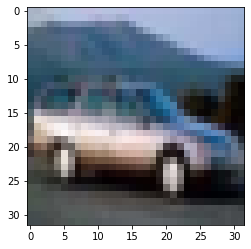

In [ ]:
#just to check what kind of image we can see
plt.imshow(X_train_full[4])

In [ ]:
#linking the image to its category
y_train_full[4]
np.take(data_cat, y_train_full[4])

array(['Automobile'], dtype='<U10')

In [ ]:
#reshaing the data to ensure it fits properly in the model
X_train_full = X_train_full.reshape(50000,32,32,3)
X_test = X_test.reshape(10000,32,32,3)
X_train_full.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
#to normalize the data
Xt_norm = X_train_full.astype('float32')
X_test_norm = X_test.astype('float32')

Xt_norm = Xt_norm/255.0  #because we want it to be a float
X_test_norm = X_test_norm/255.0

In [ ]:
#change the labels from categorical to one-hot encoding
y_train_1hot = to_categorical(y_train_full)
y_test_1hot = to_categorical(y_test)

print("Label diff: ", y_train_full[4])
print("Label now: ", y_train_1hot[4])

Label diff:  [1]
Label now:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#assiging the training and validation data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Xt_norm, y_train_1hot,
                                                  test_size=0.2, random_state=13)


In [ ]:
#to see the assigned values
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [ ]:
batch_size = 64
epochs = 20
num_cat = 10

In [ ]:
#Builing a 3 layer Convolutional Neural Network
cifar_model = Sequential()
cifar_model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), input_shape=(32, 32, 3), activation='relu'))
cifar_model.add(MaxPooling2D(2,2))
cifar_model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
cifar_model.add(MaxPooling2D(2,2))
cifar_model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
cifar_model.add(MaxPooling2D(2,2))
cifar_model.add(keras.layers.Flatten())
cifar_model.add(keras.layers.Dense(512, activation="relu"))
cifar_model.add(keras.layers.Dense(num_cat, activation="Softmax"))

In [ ]:
#
cifar_model.compile(loss="categorical_crossentropy",
                    optimizer = "Adam",
                    metrics = ['accuracy'])

In [ ]:
cifar_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 512)               0

In [ ]:
#Training the model
cifar_model_hist = cifar_model.fit(X_train, y_train, batch_size=batch_size,
                              epochs=epochs, verbose=1, validation_data=(X_val, y_val))

Epoch 1/20
625/625 [==============================] - 69s 109ms/step - loss: 1.5627 - accuracy: 0.4275 - val_loss: 1.2837 - val_accuracy: 0.5394
Epoch 2/20
625/625 [==============================] - 67s 108ms/step - loss: 1.1958 - accuracy: 0.5760 - val_loss: 1.0916 - val_accuracy: 0.6119
Epoch 3/20
625/625 [==============================] - 69s 110ms/step - loss: 1.0212 - accuracy: 0.6389 - val_loss: 0.9932 - val_accuracy: 0.6491
Epoch 4/20
625/625 [==============================] - 67s 108ms/step - loss: 0.9119 - accuracy: 0.6782 - val_loss: 0.9321 - val_accuracy: 0.6738
Epoch 5/20
625/625 [==============================] - 68s 109ms/step - loss: 0.8129 - accuracy: 0.7149 - val_loss: 0.9248 - val_accuracy: 0.6794
Epoch 6/20
625/625 [==============================] - 67s 108ms/step - loss: 0.7349 - accuracy: 0.7411 - val_loss: 0.8946 - val_accuracy: 0.6903
Epoch 7/20
625/625 [==============================] - 68s 109ms/step - loss: 0.6631 - accuracy: 0.7673 - val_loss: 0.8251 - val_ac

In [ ]:
cifar_model_hist.history

{'loss': [1.562675952911377,
  1.1957696676254272,
  1.0212112665176392,
  0.9119345545768738,
  0.812935471534729,
  0.7349283695220947,
  0.663073718547821,
  0.5923012495040894,
  0.5291378498077393,
  0.46169188618659973,
  0.40271538496017456,
  0.34673190116882324,
  0.29695364832878113,
  0.2567219138145447,
  0.219261035323143,
  0.18577615916728973,
  0.15739883482456207,
  0.14199574291706085,
  0.1263023316860199,
  0.11113893985748291],
 'accuracy': [0.42754998803138733,
  0.5759750008583069,
  0.638949990272522,
  0.6782000064849854,
  0.714900016784668,
  0.741100013256073,
  0.7672500014305115,
  0.7934749722480774,
  0.8148999810218811,
  0.8382999897003174,
  0.8579750061035156,
  0.8785499930381775,
  0.8958250284194946,
  0.9091500043869019,
  0.9231749773025513,
  0.9358749985694885,
  0.9435250163078308,
  0.9505000114440918,
  0.9573000073432922,
  0.9617249965667725],
 'val_loss': [1.2836668491363525,
  1.0916091203689575,
  0.9932034015655518,
  0.93208718299865

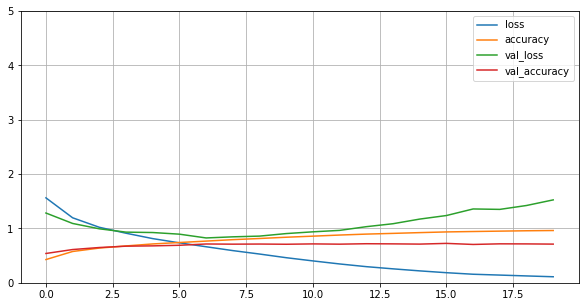

In [ ]:
pd.DataFrame(cifar_model_hist.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

In [ ]:
#evaluate the model
cifar_model_eval = cifar_model.evaluate(X_test_norm, y_test_1hot, verbose=0)

In [ ]:
#print results
print('Test loss: ', cifar_model_eval[0])
print('Test accuracy: ', cifar_model_eval[1])

Test loss:  1.6065211296081543
Test accuracy:  0.7074999809265137


In [ ]:
#create new test data
x_new = X_test_norm[:4]

In [ ]:
#Make predictions based on new data
y_proba = cifar_model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.74, 0.  , 0.26, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(cifar_model.predict(x_new), axis=-1)
y_pred

array([3, 8, 8, 0])

In [ ]:
np.array(data_cat)[y_pred]

array(['Cat', 'Ship', 'Ship', 'Airplane'], dtype='<U10')

AxesImage(54,36;334.8x217.44)


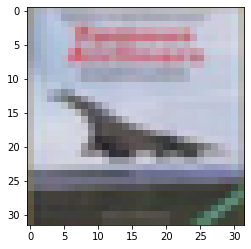

In [ ]:
print(plt.imshow(X_test[3]))